In [32]:
import pandas as pd
from fractions import Fraction
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter, LogLocator, FuncFormatter
import seaborn as sns
import numpy as np

In [3]:
# Read the two CSV files
df_part1 = pd.read_csv('processed_data_part1.csv')
df_part2 = pd.read_csv('processed_data_part2.csv')

# Concatenate the two DataFrames
df = pd.concat([df_part1, df_part2], ignore_index=True)

pd.set_option('display.max_colwidth', None)
df.head(2)

,PMID,Title,Abstract,Authors,Publication Date,DOI,Abstract_Length
0,24645995,α-1 antitrypsin and chronic fatigue syndrome: a case study from pathophysiology to clinical practice.,SUMMARY Several lines of evidence support the involvement of inflammatory and immunologic abnormalities in chronic fatigue syndrome CFS Since recent studies have shown that α1 antitrypsin AAT possesses antiinflammatory properties the potential therapeutic effect of AAT treatment on CFS has been investigated A 49yearold woman diagnosed with CFS was treated with intravenous infusions of a human plasmaderived AAT concentrate 60 mgkg body weight weekly for 8 consecutive weeks The patients monocyte elastase a regulator of inflammatory processes was 1170 Umg At completion of treatment improvement in maximal workload was observed 540717 of predicted Additionally amelioration in working memory scores 8394 and perceptual organization scores 7583 were detected on the Wechsler Adult Intelligence ScaleIII test Monocyte elastase decreased to a normal range 150 Umg Improvement in functional capacity allowed the patient to work in parttime employment These findings suggest a possible role for AAT in the treatment of CFS,Jose Alegre; Sandra Camprubi; Ana GarciaQuintana,2013-Mar,10.2217/pmt.12.84,1020
1,24565439,A data-driven acute inflammation therapy.,Acute inflammation is a severe medical condition defined as an inflammatory response of the body to an infection Its rapid progression requires quick and accurate decisions from clinicians Inadequate and delayed decisions makes acute inflammation the 10th leading cause of death overall in United States with the estimated cost of treatment about 17 billion annually However despite the need there are limited number of methods that could assist clinicians to determine optimal therapies for acute inflammation We developed a datadriven method for suggesting optimal therapy by using machine learning model that is learned on historical patients behaviors To reduce both the risk of failure and the expense for clinical trials our method is evaluated on a virtual patients generated by a mathematical model that emulates inflammatory response In conducted experiments acute inflammation was handled with two complimentary pro and antiinflammatory medications which adequate timing and doses are crucial for the successful outcome Our experiments show that the dosage regimen assigned with our datadriven method significantly improves the percentage of healthy patients when compared to results by other methods used in clinical practice and found in literature Our method saved 88 of patients that would otherwise die within a week while the best method found in literature saved only 73 of patients At the same time our method used lower doses of medications than alternatives In addition our method achieved better results than alternatives when only incomplete or noisy measurements were available over time as well as it was less affected by therapy delay The presented results provide strong evidence that models from the artificial intelligence community have a potential for development of personalized treatment strategies for acute inflammation,Vladan Radosavljevic; Kosta Ristovski; Zoran Obradovic,2013,10.1186/1755-8794-6-S3-S7,1853


In [4]:
print(df.shape)
print(df.isnull().sum())  # Check for missing values
df.columns  # Check all column names 

(58535, 7)
PMID                0
Title               0
Abstract            0
Authors             0
Publication Date    0
DOI                 0
Abstract_Length     0
dtype: int64


Index(['PMID', 'Title', 'Abstract', 'Authors', 'Publication Date', 'DOI',
       'Abstract_Length'],
      dtype='object')

In [9]:
df['Abstract_Length'] = df['Abstract'].apply(len)

# Sort the DataFrame by the length of abstracts
df_sorted = df.sort_values('Abstract_Length')

# Display the shortest abstracts (abstracts can be shorter than 100 characters due to cleaning)
pd.set_option('display.max_colwidth', None)
df_sorted.head(3)

,PMID,Title,Abstract,Authors,Publication Date,DOI,Abstract_Length
23778,33671343,Changing Dental Profession-Modern Forms and Challenges in Dental Practice.,In the last two decades an increasing trend towards new forms of dental practice was observed,Thomas Gerhard Wolf; Guglielmo Campus,2021-Feb-17,10.3390/ijerph18041945,93
29343,34943534,"Special Issue ""Advances in Breast MRI"".",We thank all the authors reviewers and the editorial staff who contributed to this Special Issue,Francesca Galati; Rubina Manuela Trimboli; Federica Pediconi,2021-Dec-08,10.3390/diagnostics11122297,96
29169,34972694,Integrating artificial intelligence in bedside care for covid-19 and future pandemics.,bMichael Yu and colleaguesb examine the challenges in developing AI tools for use at point of care,Michael Yu; An Tang; Kip Brown; Rima Bouchakri; Pascal StOnge; Sheng Wu; John Reeder; Louis Mullie; Michael Chasse,2021-Dec-31,10.1136/bmj-2021-068197,98


In [7]:
# Minimum, Maximum, and Mean
min_length = df['Abstract_Length'].min()
max_length = df['Abstract_Length'].max()
mean_length = df['Abstract_Length'].mean()
std_dev_length = df['Abstract_Length'].std()

print(f"Minimum Abstract Length: {min_length}")
print(f"Maximum Abstract Length: {max_length}")
print(f"Average Abstract Length: {mean_length:.2f}")
print(f"Standard Deviation of Abstract Length: {std_dev_length:.2f}")


Minimum Abstract Length: 93
Maximum Abstract Length: 60664
Average Abstract Length: 1504.78
Standard Deviation of Abstract Length: 564.07


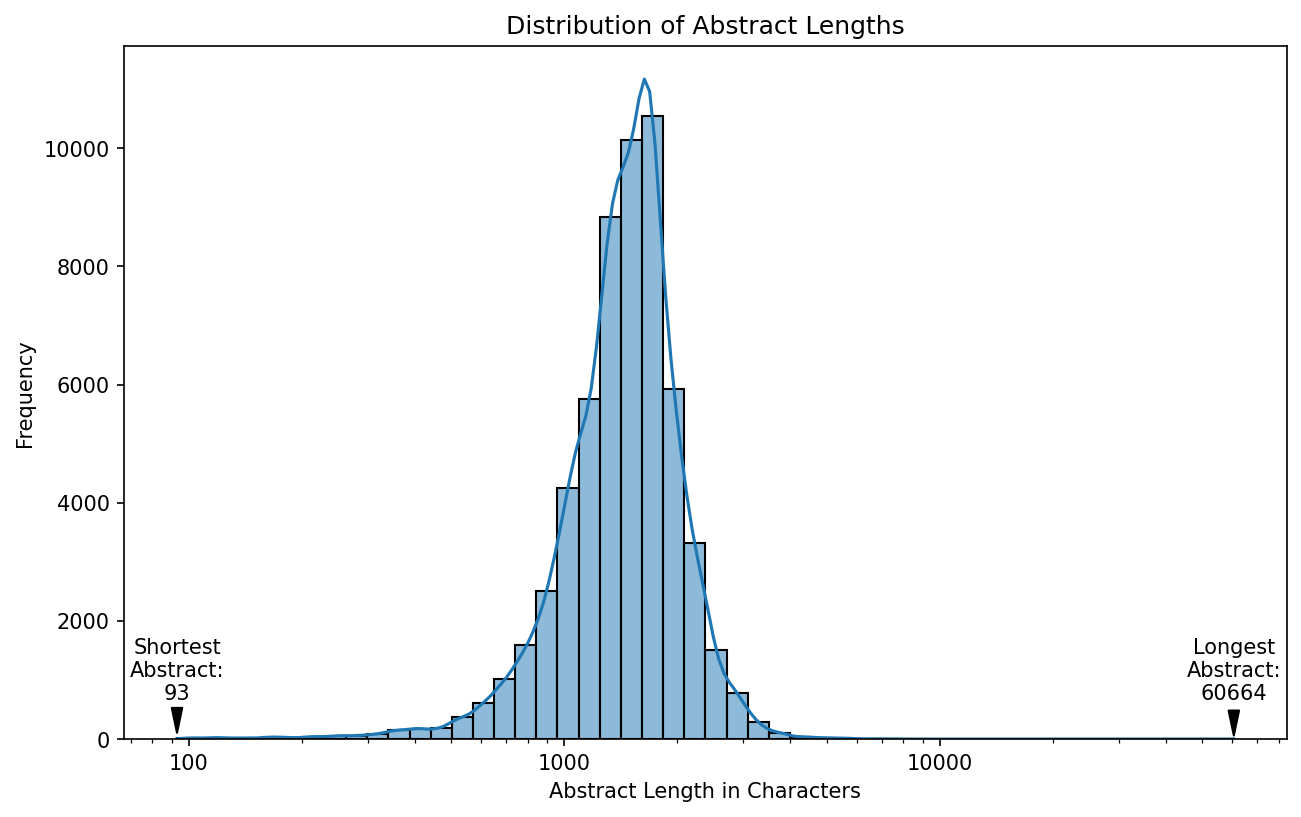

In [51]:
# Histogram of abstract lengths
plt.figure(figsize=(10, 6), dpi=150)
sns.histplot(df['Abstract_Length'], bins=50, kde=True, log_scale=(True, False))  # Nur X-Achse logarithmisch

# Name titles
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Abstract Length in Characters')
plt.ylabel('Frequency')

# LogFormatter verwenden, um die Achsenbeschriftungen anzupassen
formatter = LogFormatter(10, labelOnlyBase=False)
plt.gca().xaxis.set_major_formatter(formatter)

# Annotate the shortest abstract
plt.annotate(f'Shortest\nAbstract:\n93', xy=(93, 50), xytext=(93, 600),
             arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=5),
             horizontalalignment='center', verticalalignment='bottom')

# Annotate the longest abstract
plt.annotate(f'Longest\nAbstract:\n60664', xy=(60664, 0), xytext=(60664, 600),
             arrowprops=dict(facecolor='black', shrink=0.1,  width=1, headwidth=5),
             horizontalalignment='center', verticalalignment='bottom')

# Save plot
plt.savefig("../docs/images/distribution_abstract_length_log_scale.png")
plt.show()

In [52]:
# Distribution of publications over the years
# Group by 'Year' and count the number of publications each year
publications_per_year = df.groupby('Publication Date').size()

# Convert the series to a DataFrame
publications_per_year_df = publications_per_year.reset_index(name='Frequency')

# Plot the distribution of publications over the years
plt.figure(figsize=(12, 6))
plt.plot(publications_per_year_df['Year'], publications_per_year_df['Frequency'], marker='o')
plt.title('Distribution of Publications on "Intelligence" Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

KeyError: 'Year'

<Figure size 1200x600 with 0 Axes>